# Introduction

This is a part of milestone project I have done, it was related to healthcare business which included multiple questions were answered.

In this part, I am going to explain step by step with more details how can analyze reqular texts were taken from a hospital system specifically an emergency data within the first quarter of 2021 by using python with some libraries.

## Strategy

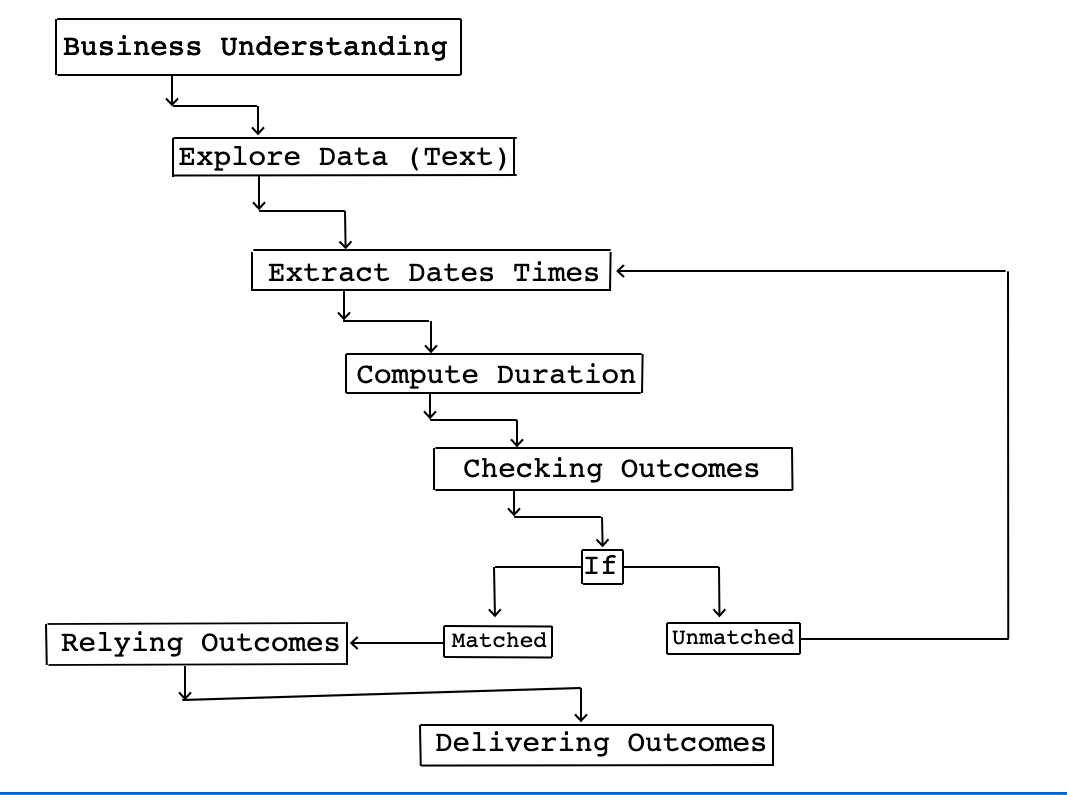

## Business Understanding

There were critical questions I should answers them, these questions were related to patientes who came to an emergency department and received medical consultations. Some of them did not need medical consultations while others had getten it.

These the following questions I had getting from Quality departement in that hospital:

1. How many patients who did or did not receive medical consulations?
2. How many were total consultations? As you know some status recieve more than a one consultation.
3. How long consumeed consultation or the duration betweeen the request and reply?
4. Did there any consultatios without reply? If yes, how many did have?


# Explore Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd

# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# the figure on cell 
%matplotlib inline

In [5]:
# load data
df = pd.read_excel('Al-Noor Laboratory/big project.xlsx')

In [6]:
# consultations dataframe
consultations = df.loc[:,['CONSULTATIONS']]

In [7]:
# the first 10 rows of counsultaions
consultations.head(10)

,CONSULTATIONS
0,NaN
1,Request:01-01-2021 23:38 Reply:02-01-2021 00:36
2,NaN
3,NaN
4,NaN
5,NaN
6,Request:02-01-2021 00:40 Reply:02-01-2021 01:2...
7,Request:02-01-2021 00:49 Reply:02-01-2021 01:39
8,Request:02-01-2021 03:24 Reply:02-01-2021 04:06
9,NaN


As you saw above, we have null values.

In [8]:
# shape of consultations (rows, columns)
consultations.shape

(29956, 1)

**How many patients who did or did not receive medical consulations?**

In [9]:
print(f'There were {consultations.isna().sum()[0]} patients had not received consultations.')

There were 18448 patients had not received consultations.


In [10]:
print(f'There were {consultations[~consultations.isna()].shape[0] - consultations.isna().sum()[0]} patient had recieved consultations.')

There were 11508 patient had recieved consultations.


Let us discover consultation values 

In [11]:
# display the index no six of consultations 
consultations.iloc[6][0]

'Request:02-01-2021 00:40 Reply:02-01-2021 01:21;Request:02-01-2021 00:49 Reply:02-01-2021 01:30'

As we saw above, we have two consultations each one has a request and reply date time :
- Request date: this the date when an emergency physician ordered a consultation 
- Reply date: this the date when a consultation doctor response 

## Extract Dates Times from Text

Here, we should think on strategy to extract date time of request and replay, then compute the duration by subtracte reply from request.

As we noted above, each single consultation seperated by semicolon `;` for others, and this will help us and by use `split function` with semicolon `;` we can convert text (string) to list.

so our strategy as following:
1. convert text (string) to list by seperating each single consultation by use `split` function with ';'
2. determine all indexes of request and reply date time
3. compute the duration between request and reply 
4. re-confirm all dates times correctly extracted

Let us do it.

### 1. convert text (string) to list

we can split each value with two ways:
1. by using dictionary comperhension and use `split` function with string
2. by using `apply` and `lambda` functions then use `split` function with string 

In [12]:
consultations.apply(lambda x: x.split(';'))

AttributeError: 'Series' object has no attribute 'split'

Why this error ? 
- Because we have null values "NaN" as float, as we know float has not attribute called "split"

How can we solve this issue?
- Remving null values by using mask then we can split text (string) to list

Let us do it

In [13]:
# create mask to determine all null values as True otherwise as False
mask = consultations.isna()
mask

,CONSULTATIONS
0,True
1,False
2,True
3,True
4,True
...,...
29951,False
29952,False
29953,True
29954,False


then we catch all non null values with a sign not `~` before mask

In [14]:
consultation_without_null_vals = consultations[~mask]
consultation_without_null_vals

,CONSULTATIONS
0,NaN
1,Request:01-01-2021 23:38 Reply:02-01-2021 00:36
2,NaN
3,NaN
4,NaN
...,...
29951,Request:31-03-2021 18:58 Reply:01-04-2021 00:37
29952,Request:31-03-2021 14:21 Reply:31-03-2021 14:3...
29953,NaN
29954,Request:31-03-2021 15:13 Reply:31-03-2021 16:19


Why the mask which we applied does not work ? let's think more about this issue.

let's try to apply the sign `not` with series not dataframe:
- let's take the consultations as a series without frame
- then create mask with null values
- and remove null values by use the sign `not`

consultations feature (series) 

In [26]:
series_consult = consultations.iloc[:,0]
series_consult

0                                                      NaN
1          Request:01-01-2021 23:38 Reply:02-01-2021 00:36
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
29951      Request:31-03-2021 18:58 Reply:01-04-2021 00:37
29952    Request:31-03-2021 14:21 Reply:31-03-2021 14:3...
29953                                                  NaN
29954      Request:31-03-2021 15:13 Reply:31-03-2021 16:19
29955      Request:31-03-2021 14:37 Reply:31-03-2021 19:13
Name: CONSULTATIONS, Length: 29956, dtype: object

create mask 

In [27]:
mask = series_consult.isna()
mask

0         True
1        False
2         True
3         True
4         True
         ...  
29951    False
29952    False
29953     True
29954    False
29955    False
Name: CONSULTATIONS, Length: 29956, dtype: bool

Remove all null values from consultations

In [28]:
series_consult_without_null_vals = series_consult[~mask]
series_consult_without_null_vals

1          Request:01-01-2021 23:38 Reply:02-01-2021 00:36
6        Request:02-01-2021 00:40 Reply:02-01-2021 01:2...
7          Request:02-01-2021 00:49 Reply:02-01-2021 01:39
8          Request:02-01-2021 03:24 Reply:02-01-2021 04:06
11         Request:01-01-2021 23:46 Reply:02-01-2021 00:29
                               ...                        
29950      Request:31-03-2021 18:01 Reply:31-03-2021 18:12
29951      Request:31-03-2021 18:58 Reply:01-04-2021 00:37
29952    Request:31-03-2021 14:21 Reply:31-03-2021 14:3...
29954      Request:31-03-2021 15:13 Reply:31-03-2021 16:19
29955      Request:31-03-2021 14:37 Reply:31-03-2021 19:13
Name: CONSULTATIONS, Length: 11508, dtype: object

yahooo, we got it. 
- as we saw above we have all consultations without null values
- each patient differ others the number of consultations

After we applied mask, all null values are ignored. Let's now extract request and reply date time.

Wait wait, do you think we have request date time without reply data time?

May be, remmber this question we will come back? 

In [29]:
type(series_consult_without_null_vals[1])

str

As we saw above each value in the consultation feature (column) as text (string) str refer to string. We should covert text (string) to list to split each single consultation seperatly.

let's convert text (string) to list

### first way

In [30]:
dict_consult = {i:s.split(';') for i, s in series_consult_without_null_vals.items() }
dict_consult

{1: ['Request:01-01-2021 23:38 Reply:02-01-2021 00:36'],
 6: ['Request:02-01-2021 00:40 Reply:02-01-2021 01:21',
  'Request:02-01-2021 00:49 Reply:02-01-2021 01:30'],
 7: ['Request:02-01-2021 00:49 Reply:02-01-2021 01:39'],
 8: ['Request:02-01-2021 03:24 Reply:02-01-2021 04:06'],
 11: ['Request:01-01-2021 23:46 Reply:02-01-2021 00:29'],
 12: ['Request:01-01-2021 21:11 Reply:01-01-2021 22:31'],
 13: ['Request:01-01-2021 21:32 Reply:01-01-2021 22:39'],
 14: ['Request:01-01-2021 22:35 Reply:01-01-2021 23:51'],
 15: ['Request:01-01-2021 21:49 Reply:01-01-2021 23:14'],
 16: ['Request:02-01-2021 02:33 Reply:02-01-2021 03:07'],
 17: ['Request:01-01-2021 21:41 Reply:01-01-2021 22:47'],
 19: ['Request:01-01-2021 17:51 Reply:01-01-2021 19:12'],
 20: ['Request:01-01-2021 16:56 Reply:01-01-2021 17:46'],
 22: ['Request:01-01-2021 19:05 Reply:01-01-2021 19:51'],
 24: ['Request:01-01-2021 18:25 Reply:01-01-2021 23:17',
  'Request:01-01-2021 21:22 Reply:01-01-2021 22:15'],
 25: ['Request:01-01-2021 20

As we saw above, we have used `.itmes()` method which we can reach to `keys and values` inside series and created `for loop` and splitted each values (text) with semicolon `;` and converted it to list.
Now, we should convert dictionay to series.

In [31]:
series_consult_lst_1 = pd.Series(dict_consult)
series_consult_lst_1

1        [Request:01-01-2021 23:38 Reply:02-01-2021 00:36]
6        [Request:02-01-2021 00:40 Reply:02-01-2021 01:...
7        [Request:02-01-2021 00:49 Reply:02-01-2021 01:39]
8        [Request:02-01-2021 03:24 Reply:02-01-2021 04:06]
11       [Request:01-01-2021 23:46 Reply:02-01-2021 00:29]
                               ...                        
29950    [Request:31-03-2021 18:01 Reply:31-03-2021 18:12]
29951    [Request:31-03-2021 18:58 Reply:01-04-2021 00:37]
29952    [Request:31-03-2021 14:21 Reply:31-03-2021 14:...
29954    [Request:31-03-2021 15:13 Reply:31-03-2021 16:19]
29955    [Request:31-03-2021 14:37 Reply:31-03-2021 19:13]
Length: 11508, dtype: object

### second way by using built in functions

In [32]:
series_consult_lst_2 = series_consult_without_null_vals.apply(lambda x: x.split(';'))
series_consult_lst_2

1        [Request:01-01-2021 23:38 Reply:02-01-2021 00:36]
6        [Request:02-01-2021 00:40 Reply:02-01-2021 01:...
7        [Request:02-01-2021 00:49 Reply:02-01-2021 01:39]
8        [Request:02-01-2021 03:24 Reply:02-01-2021 04:06]
11       [Request:01-01-2021 23:46 Reply:02-01-2021 00:29]
                               ...                        
29950    [Request:31-03-2021 18:01 Reply:31-03-2021 18:12]
29951    [Request:31-03-2021 18:58 Reply:01-04-2021 00:37]
29952    [Request:31-03-2021 14:21 Reply:31-03-2021 14:...
29954    [Request:31-03-2021 15:13 Reply:31-03-2021 16:19]
29955    [Request:31-03-2021 14:37 Reply:31-03-2021 19:13]
Name: CONSULTATIONS, Length: 11508, dtype: object

Let's take one index for example index 6

In [33]:
series_consult_lst_2[6]

['Request:02-01-2021 00:40 Reply:02-01-2021 01:21',
 'Request:02-01-2021 00:49 Reply:02-01-2021 01:30']

Let us check if this patient recieved two consultations in the original data

In [34]:
consultations.iloc[6][0]

'Request:02-01-2021 00:40 Reply:02-01-2021 01:21;Request:02-01-2021 00:49 Reply:02-01-2021 01:30'

As we noted, this patient recieved two consultation, each one with Request and Reply

### Compute length of single consultation

One more thing I would to check, How long single consultation ?

In [37]:
# let us print the first consultation of index six
series_consult_lst_2[6][0]

'Request:02-01-2021 00:40 Reply:02-01-2021 01:21'

In [38]:
len(series_consult_lst_2[6][0])

47

check all consultations should have the same length 47. if anyone has less than that, it means there is request without reply.

let us check that.

1. we need to compute the lenght of each consultations.
2. extending all consultaions together in one lst.
3. converting lst to series and check number of unique values or by convert lst to set.
4. computing total of length consultations with 31.
5. extracting all indexes for these consultations with lenght 31.
6. checking if all consulations have the same lenght as consultatins indexes. Should be same length and finding these consultatins by indexes to see why they have 31 length.

#### 1st step 
- we need to compute the length of each consultation.
- by use `apply` and `lambda` functions and list comperhension to compute the length of each value of consultation.

In [40]:
len_consutlation_lst = series_consult_lst_2.apply(lambda x: [len(n) for n in x])
len_consutlation_lst

1            [47]
6        [47, 47]
7            [47]
8            [47]
11           [47]
           ...   
29950        [47]
29951        [47]
29952    [47, 47]
29954        [47]
29955        [47]
Name: CONSULTATIONS, Length: 11508, dtype: object

As we saw above some indexes have more than one consultation, we need to join all consutations togther.

#### 2nd step
- Extending all consultaions toghter to one list

In [41]:
total_len_consult_lst = []
for lst in len_consutlation_lst:
    total_len_consult_lst.extend(lst)
    
total_len_consult_lst[:10]

[47, 47, 47, 47, 47, 47, 47, 47, 47, 47]

ok, that's good, we have the lenght of each single consultation. Now we can find the unique of values for this list by convert list to set or to series.

**What were total consultations?**

In [42]:
len(total_len_consult_lst)

13928

Good good, we have 13928 total consultations.

Now, we check all these have the same length 47 or not.

**Did there any consultatios without reply? If yes, how many did have?**

#### 3rd step
converting list to series and check number of unique values or by convert list to set.

In [43]:
set(total_len_consult_lst)

{31, 47}

In [44]:
pd.Series(total_len_consult_lst).unique()

array([47, 31])

let's come back to our question if you have remembered. 

Do you think we have request date time without reply data time? 

Here we can say these consultations with lenght 31 have request without reply.

#### 4th step
Computing total of length consultations with 31.

let's create for loop by use list comperhension and find only total consultations without reply

In [30]:
len([n for n in total_len_consult_lst if n==31])

1208

#### 5th step
Extracting all indexes for these consultations with lenght 31.

Why we are going to determining all indexes of consultations length = 31 ?

Because, we want to check these indexes with original data indexs if they have the same lenght of selected consultations.

In [45]:
index_lst_31 = []
for i in len_consutlation_lst.index:
    if len(len_consutlation_lst[i]) > 1:
        for n in len_consutlation_lst[i]:
            if n == 31:
              index_lst_31.append(i)
    else:
        if len_consutlation_lst[i][0] == 31:
            index_lst_31.append(i)

How many indexes with 31 lengths?

In [46]:
len(index_lst_31)

1208

Ok, we have `13928` total consultations, a `1208` without reply data time and `11720` with reply data time.

#### 6th step
checking if all indexes have at least a one consultation with a length 31 and finding these consultatins by indexes to see why they have 31 length?

After we extracted all indexes of consultations with a lenght 31, we need indexes of these consultations (without reply) to check if they have request without reply or not.

Let us see the 1st ten indexes

In [54]:
index_lst_31[:10]

[31, 32, 39, 53, 56, 80, 97, 105, 176, 178]

**1st index**

In [55]:
series_consult_lst_2[31]

['Request:01-01-2021 21:27 Reply:01-01-2021 22:12',
 'Request:01-01-2021 21:28 Reply:']

**1st index in the original data**

In [56]:
consultations.iloc[31,:][0]

'Request:01-01-2021 21:27 Reply:01-01-2021 22:12;Request:01-01-2021 21:28 Reply:'

As we saw above, this index has one consultation with reply date time and other consultation without reply date time. The first consultation has lenght 47 but the second has lenght 31.

To prevent the confusing, some of indexes with multiple consultations and these might be with or without reply date time. As we saw in the index 31.

In [57]:
len(series_consult_lst_2[31][0])

47

In [58]:
len(series_consult_lst_2[31][1])

31

let us see the last ten indexes

In [52]:
index_lst_31[-10:]

[29702, 29727, 29766, 29812, 29861, 29861, 29866, 29878, 29885, 29889]

last index

In [53]:
series_consult_lst_2[29889]

['Request:31-03-2021 04:33 Reply:',
 'Request:31-03-2021 05:22 Reply:31-03-2021 05:28']

As we saw above, this index has two consulations first one without reply date time and second one with reply date time. The first consultation has lenght 31 but the second has lenght 47.

After we convert text (string) to list, let's move to next step.

#### determine indexes of consultations request and reply date time

In [59]:
consult_lst1 = series_consult_lst_2.apply(lambda x: [ x[i][8:25] +'  '+ x[i][31:] for i in range(len(x)) ])

In [60]:
consult_lst1

1                    [01-01-2021 23:38   02-01-2021 00:36]
6        [02-01-2021 00:40   02-01-2021 01:21, 02-01-20...
7                    [02-01-2021 00:49   02-01-2021 01:39]
8                    [02-01-2021 03:24   02-01-2021 04:06]
11                   [01-01-2021 23:46   02-01-2021 00:29]
                               ...                        
29950                [31-03-2021 18:01   31-03-2021 18:12]
29951                [31-03-2021 18:58   01-04-2021 00:37]
29952    [31-03-2021 14:21   31-03-2021 14:30, 31-03-20...
29954                [31-03-2021 15:13   31-03-2021 16:19]
29955                [31-03-2021 14:37   31-03-2021 19:13]
Name: CONSULTATIONS, Length: 11508, dtype: object

### Computing the duration between Request and Reply date time 




$$Duration = Reply - Request$$

How we can determine indexes of request and reply dates times?

let us take index 6.

In [69]:
consult_lst1[6]

['02-01-2021 00:40   02-01-2021 01:21', '02-01-2021 00:49   02-01-2021 01:30']

As we saw above, each request and reply date time inside a single index in the list. Wait but if we have indexes without reply dates times.

let us take another index 31.

In [71]:
consult_lst1[31]

['01-01-2021 21:27   01-01-2021 22:12', '01-01-2021 21:28   ']

As we saw above, the first index with request and reply date time but the second without reply date time.

In [74]:
len('01-01-2021 21:27   01-01-2021 22:12')

35

In [75]:
len('01-01-2021 21:27')

16

from the text (string) of request date time, its length ends at index 16

In [76]:
len('01-01-2021 21:27   ')

19

while reply date time, its length begin at index 19

we will use `to_datetime` function to convert request and reply text to date time and specify two parameters `errors` to ignore any request date time without reply date time and `dayfirst` as true because our date start with day not month.

In [93]:
consult_duration = consult_lst1.apply(lambda x: [pd.to_datetime(x[i][19:], errors='coerce',dayfirst=True) - pd.to_datetime(x[i][:16], errors='coerce', dayfirst=True) for i in range(len(x))])

In [94]:
consult_duration

1                         [0 days 00:58:00]
6        [0 days 00:41:00, 0 days 00:41:00]
7                         [0 days 00:50:00]
8                         [0 days 00:42:00]
11                        [0 days 00:43:00]
                        ...                
29950                     [0 days 00:11:00]
29951                     [0 days 05:39:00]
29952    [0 days 00:09:00, 0 days 01:02:00]
29954                     [0 days 01:06:00]
29955                     [0 days 04:36:00]
Name: CONSULTATIONS, Length: 11508, dtype: object

As you see above, we computed the duration of consulations by subtract replay date time from request date time.

Now, let us check if these durations correclty computed or not.
1. we will select randomly five indexes
2. then see each index in the list of durations and compare it with original request and reply date time 

In [96]:
np.random.seed(47)
random_indexs = np.random.choice(consult_duration.index,5)

In [97]:
random_indexs

array([13390,  4649, 17243, 22829,  7271])

In [102]:
for i in random_indexs:
    print(f'Index No:   {i}')
    print(f'The duration/s of {i}: \n{consult_duration[i]}')
    print(f'Request and Reply date time after we extracted: \n{consult_lst1[i]}')
    print(f'Request and Reply dat time in the original data: \n{series_consult_lst_2[i]}')
    print('==================================')

Index No:   13390
The duration/s of 13390: 
[Timedelta('0 days 00:56:00')]
Request and Reply date time after we extracted: 
['10-02-2021 13:40   10-02-2021 14:36']
Request and Reply dat time in the original data: 
['Request:10-02-2021 13:40 Reply:10-02-2021 14:36']
Index No:   4649
The duration/s of 4649: 
[Timedelta('0 days 00:15:00'), Timedelta('0 days 00:37:00')]
Request and Reply date time after we extracted: 
['14-01-2021 04:16   14-01-2021 04:31', '14-01-2021 04:32   14-01-2021 05:09']
Request and Reply dat time in the original data: 
['Request:14-01-2021 04:16 Reply:14-01-2021 04:31', 'Request:14-01-2021 04:32 Reply:14-01-2021 05:09']
Index No:   17243
The duration/s of 17243: 
[NaT]
Request and Reply date time after we extracted: 
['22-02-2021 16:29   ']
Request and Reply dat time in the original data: 
['Request:22-02-2021 16:29 Reply:']
Index No:   22829
The duration/s of 22829: 
[Timedelta('0 days 00:50:00')]
Request and Reply date time after we extracted: 
['11-03-2021 06:5

Amazing work, All five indexes in the list of duration mached request and reply date time in the original data.
look at index 17243 without reply data time, so the duration was NaT.

Now, we would like to know the maximum number of consultations.

In [103]:
series_consult_lst_2.apply(lambda x: len(x)).value_counts()

1     9809
2     1242
3      303
4       89
5       35
6       21
7        5
8        3
10       1
Name: CONSULTATIONS, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-104-cc8170bd0b4a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


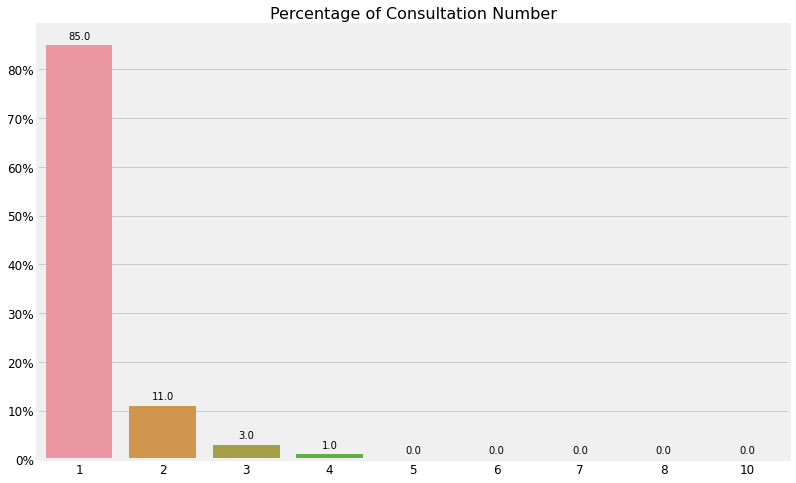

In [104]:
plt.figure(figsize=(12,8))

x = series_consult_lst_2.apply(lambda x: len(x)).value_counts().keys()
y = series_consult_lst_2.apply(lambda x: len(x)).value_counts(normalize=True).values.round(2) * 100

splot = sns.barplot(x,y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Consultation Number', fontsize=16);

The maximum number of consultations was ten consultations happened once time "for one patinet" the maximum frequence was one consultation with 85%.
let us see that index with ten consultations

Let us find the index of ten consulations

In [105]:
max_consultations = series_consult_lst_2.apply(lambda x: len(x)).max()
max_consultations

10

In [106]:
series_consult_lst_2[series_consult_lst_2.apply(lambda x: len(x)) == max_consultations]

14775    [Request:14-02-2021 20:28 Reply:14-02-2021 20:...
Name: CONSULTATIONS, dtype: object

In [107]:
series_consult_lst_2[14775]

['Request:14-02-2021 20:28 Reply:14-02-2021 20:35',
 'Request:14-02-2021 23:28 Reply:15-02-2021 07:18',
 'Request:14-02-2021 23:31 Reply:14-02-2021 23:40',
 'Request:14-02-2021 23:40 Reply:15-02-2021 03:05',
 'Request:14-02-2021 23:43 Reply:15-02-2021 01:39',
 'Request:15-02-2021 02:06 Reply:15-02-2021 05:13',
 'Request:15-02-2021 02:09 Reply:15-02-2021 02:58',
 'Request:15-02-2021 02:13 Reply:15-02-2021 03:30',
 'Request:15-02-2021 02:20 Reply:15-02-2021 02:31',
 'Request:15-02-2021 02:21 Reply:15-02-2021 03:13']

After we validated durations with request and reply date time. 
Let us extend all durations of consultations toghter to find basic statistics "central tendency".

In [108]:
total_duration_lst = []
for lst in consult_duration:
    total_duration_lst.extend(lst)

In [109]:
consult_duration_df = pd.DataFrame(total_duration_lst, columns=['Consultations Durations'])

**How long consumeed consultation or the duration betweeen the request and reply?**

In [110]:
consult_duration_df.describe()

,Consultations Durations
count,12720
mean,0 days 01:57:56.316037735
std,0 days 08:25:37.195638597
min,0 days 00:00:00
25%,0 days 00:32:00
50%,0 days 01:02:00
75%,0 days 01:53:00
max,15 days 16:01:00


let us see the max duration of consultation.

In [112]:
# find the index of max duration of consultations
for i in consult_duration.index:
    for d in consult_duration[i]:
        if d == pd.to_timedelta('15 days 16:01:00'):
            print(f'{i}:', consult_duration[i])

27: [Timedelta('15 days 16:01:00'), Timedelta('0 days 01:13:00')]


In [113]:
# find the value of this index [27] in the list of consultations
series_consult_lst_2[27]

['Request:01-01-2021 19:44 Reply:17-01-2021 11:45',
 'Request:01-01-2021 20:45 Reply:01-01-2021 21:58']

In [115]:
# check this index [27] in the list of consultations, does duration match request and reply date time?
consult_lst1[27]

['01-01-2021 19:44   17-01-2021 11:45', '01-01-2021 20:45   01-01-2021 21:58']

In [114]:
# check this index [27] in the original data, does duration match request and reply date time?
consultations.iloc[27,:][0]

'Request:01-01-2021 19:44 Reply:17-01-2021 11:45;Request:01-01-2021 20:45 Reply:01-01-2021 21:58'

As we see above, the maximum duration was in the index 27, it was matched the original data